# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 線性迴歸基本概念

#### 直線

$$f(x) = 1.2x + 0.8$$



In [2]:
#準備 50 個點
#5-0/50 = 0.1 +....
# 0~5線性切割
x = np.linspace(0, 5, 50)
print(x)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]


In [3]:
y = 1.2*x + 0.8
y

array([0.8       , 0.92244898, 1.04489796, 1.16734694, 1.28979592,
       1.4122449 , 1.53469388, 1.65714286, 1.77959184, 1.90204082,
       2.0244898 , 2.14693878, 2.26938776, 2.39183673, 2.51428571,
       2.63673469, 2.75918367, 2.88163265, 3.00408163, 3.12653061,
       3.24897959, 3.37142857, 3.49387755, 3.61632653, 3.73877551,
       3.86122449, 3.98367347, 4.10612245, 4.22857143, 4.35102041,
       4.47346939, 4.59591837, 4.71836735, 4.84081633, 4.96326531,
       5.08571429, 5.20816327, 5.33061224, 5.45306122, 5.5755102 ,
       5.69795918, 5.82040816, 5.94285714, 6.06530612, 6.1877551 ,
       6.31020408, 6.43265306, 6.55510204, 6.67755102, 6.8       ])

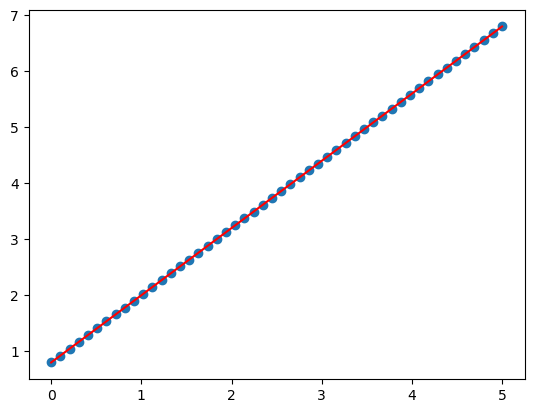

In [4]:
#畫圖
plt.scatter(x,y)
plt.plot(x, 1.2*x+0.8, 'r')

#### add noise 

$$f(x) + \varepsilon(x)$$


In [5]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)
print(y)

[1.12291231e-03 1.01922680e+00 1.00943276e+00 6.19900845e-01
 7.18128387e-01 1.43246359e+00 1.55724881e+00 1.70637499e+00
 1.30435167e+00 1.34579034e+00 1.76286343e+00 2.96321220e+00
 1.30265376e+00 2.28072991e+00 2.87089403e+00 2.20866672e+00
 3.65597947e+00 3.24632985e+00 2.70131467e+00 2.39741100e+00
 3.12206818e+00 2.67889988e+00 4.20491549e+00 3.61618646e+00
 4.20305851e+00 5.44418584e+00 3.99277168e+00 5.32292046e+00
 4.77234508e+00 4.05458972e+00 4.50096752e+00 4.80168385e+00
 4.57668597e+00 5.28408458e+00 5.36274160e+00 6.13607451e+00
 5.48066054e+00 5.28730227e+00 5.18212753e+00 4.88941086e+00
 6.97894555e+00 4.80133538e+00 6.63912158e+00 6.01895731e+00
 7.51688145e+00 5.84667884e+00 7.56455733e+00 7.15727640e+00
 7.40404562e+00 7.47521131e+00]


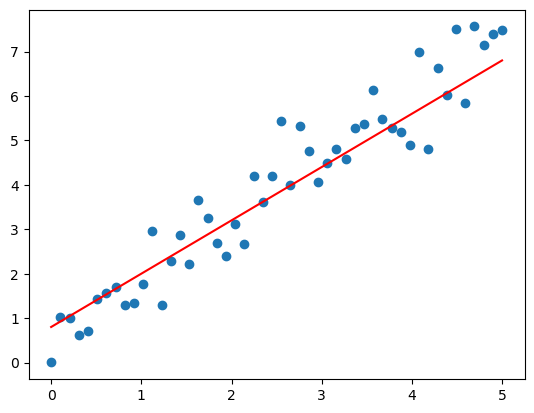

In [6]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

In [7]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [8]:
regr

LinearRegression()

要求資料轉換<br>

$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$


矩陣的概念

In [9]:
print(x.shape)
X = x.reshape(-1,1)
X.shape

(50,)


(50, 1)

In [10]:
regr.fit(X,y)

LinearRegression()

In [11]:
Y = regr.predict(X)
print(Y)

[0.51866671 0.65784014 0.79701357 0.936187   1.07536043 1.21453386
 1.35370729 1.49288072 1.63205415 1.77122758 1.91040101 2.04957444
 2.18874787 2.3279213  2.46709473 2.60626816 2.74544159 2.88461502
 3.02378845 3.16296188 3.30213531 3.44130874 3.58048217 3.7196556
 3.85882903 3.99800246 4.13717589 4.27634932 4.41552275 4.55469618
 4.69386961 4.83304304 4.97221647 5.1113899  5.25056333 5.38973676
 5.52891019 5.66808362 5.80725705 5.94643048 6.08560391 6.22477734
 6.36395077 6.5031242  6.64229763 6.78147106 6.92064449 7.05981792
 7.19899135 7.33816478]


In [12]:
#了解你的訓練參數
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

0.34269000345543643


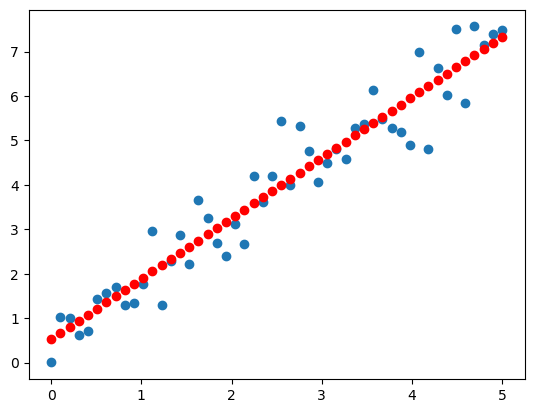

In [13]:
plt.scatter(x, y) #原本 
plt.plot(x, Y, 'ro') #預測
#calculate mse
mse = np.sum((Y-y)**2) / len(y)
print(mse)

In [14]:
#Y=WX+b
W=regr.coef_#斜率
W



array([1.36389961])

In [15]:
b=regr.intercept_ #截距
b

0.5186667135649037

In [16]:
Y

array([0.51866671, 0.65784014, 0.79701357, 0.936187  , 1.07536043,
       1.21453386, 1.35370729, 1.49288072, 1.63205415, 1.77122758,
       1.91040101, 2.04957444, 2.18874787, 2.3279213 , 2.46709473,
       2.60626816, 2.74544159, 2.88461502, 3.02378845, 3.16296188,
       3.30213531, 3.44130874, 3.58048217, 3.7196556 , 3.85882903,
       3.99800246, 4.13717589, 4.27634932, 4.41552275, 4.55469618,
       4.69386961, 4.83304304, 4.97221647, 5.1113899 , 5.25056333,
       5.38973676, 5.52891019, 5.66808362, 5.80725705, 5.94643048,
       6.08560391, 6.22477734, 6.36395077, 6.5031242 , 6.64229763,
       6.78147106, 6.92064449, 7.05981792, 7.19899135, 7.33816478])

In [18]:
#可以將新的x資料帶入算出結果
W*0.81632653+b

array([1.63205415])

In [19]:
y

array([1.12291231e-03, 1.01922680e+00, 1.00943276e+00, 6.19900845e-01,
       7.18128387e-01, 1.43246359e+00, 1.55724881e+00, 1.70637499e+00,
       1.30435167e+00, 1.34579034e+00, 1.76286343e+00, 2.96321220e+00,
       1.30265376e+00, 2.28072991e+00, 2.87089403e+00, 2.20866672e+00,
       3.65597947e+00, 3.24632985e+00, 2.70131467e+00, 2.39741100e+00,
       3.12206818e+00, 2.67889988e+00, 4.20491549e+00, 3.61618646e+00,
       4.20305851e+00, 5.44418584e+00, 3.99277168e+00, 5.32292046e+00,
       4.77234508e+00, 4.05458972e+00, 4.50096752e+00, 4.80168385e+00,
       4.57668597e+00, 5.28408458e+00, 5.36274160e+00, 6.13607451e+00,
       5.48066054e+00, 5.28730227e+00, 5.18212753e+00, 4.88941086e+00,
       6.97894555e+00, 4.80133538e+00, 6.63912158e+00, 6.01895731e+00,
       7.51688145e+00, 5.84667884e+00, 7.56455733e+00, 7.15727640e+00,
       7.40404562e+00, 7.47521131e+00])